In [1]:
import matplotlib.pyplot as plt
from IPython.display import Markdown
from IPython.display import Image
from numpy.linalg import eig
%matplotlib inline

# from spectral_clustering import *
from visualize import *
from sklearn.cluster import KMeans, SpectralClustering
import os

In [19]:
def load_graph(file_path):
    """ Loads a graph from a file path
        Args:
            file_path: file path to the image
        Returns:
            n: number of vertices
            adj_mat: Adjacency matrix of graph
                    numpy int array of shape(n, n)
            deg_mat: Degree matrix of graph
                    numpy int diagonal array of shape(n, n)
    """

    n = None
    k = None
    adj_mat = None
    deg_mat = None

    graph = []
    if os.path.isfile(os.path.expanduser(file_path)):
        with open(file_path, 'r') as f:
            n, m, k = [int(x) for x in next(f).split()]
            adj_mat = np.zeros(shape=(n, n), dtype=int)
            for line in f:
                u, v = [int(x) for x in line.split()]
                adj_mat[u][v] = 1
                adj_mat[v][u] = 1
                value = (u, v)
                graph.append(value)
            deg_mat = np.diag(np.sum(adj_mat, 0))
            
    return n, k, adj_mat, deg_mat, graph

In [20]:
graph_name = 'data'
n, k, A, D, graph = load_graph(graph_name +'.txt')
L = A - D

In [4]:
def eigen_sort(L):
    """ Calculate eigenvectors and their eigenvalue
        Sort in non-decreasing order by eigenvalue
        Args:
            L: Laplacian matrix of graph
        Returns:
            w: eigenvalues
            v: eigenvectors
    """

    w = None
    v = None

    n = len(L)
    eigval, eigvec = np.linalg.eig(L)
    a = [{'eigval': eigval[i], 'vec': eigvec.T[i]} for i in range(n)]
    
    # Python 2
#     a.sort()
    
    # Python 3
    a = sorted(a, key=lambda k: k['eigval'])
    w = [a[i]['eigval'] for i in range(n)]
    v = [a[i]['vec'] for i in range(n)]

    return w, v

In [5]:
def recursive_bi_partition(v, k):
    """ Recursive bi-partition
        Args:
            v: eigenvectors
            k: number of clusters
        Returns:
            label: result clustering
    """

    label = [0] * len(v)

    n_vec = int(np.log2(k-1)+1)
    for i in range(1, n_vec+1):
        for j in range(len(v)):
            label[j] = min(k-1, label[j]*2 + int(v[i][j] > 0))

    return label

In [6]:
eigval, eigvec = eigen_sort(L)
label = recursive_bi_partition(eigvec, k)

In [7]:
from collections import Counter
Counter(label)

Counter({0: 17,
         3030: 9,
         6363: 2,
         2265: 34,
         2906: 1,
         2178: 2,
         2294: 404,
         5941: 2,
         2601: 3,
         2290: 115,
         6385: 682,
         182: 20,
         2907: 1,
         2553: 3,
         2661: 7,
         3849: 4,
         5897: 25,
         2300: 11,
         4081: 1,
         2228: 13,
         5297: 1,
         2153: 1,
         4269: 1,
         3519: 1,
         2262: 209,
         4993: 4,
         4902: 6,
         5177: 1,
         3158: 3,
         2238: 10,
         2100: 2,
         2206: 6,
         2163: 3,
         1248: 2,
         2263: 21,
         502: 18,
         2292: 43,
         2550: 66,
         3142: 1,
         1108: 3,
         2281: 17,
         4895: 2,
         2295: 81,
         1229: 4,
         214: 7,
         1230: 1,
         2273: 17,
         6373: 2,
         5330: 1,
         6353: 3,
         2872: 1,
         3282: 13,
         3284: 5,
         20: 1,
         2430

In [11]:
label = np.array(label)

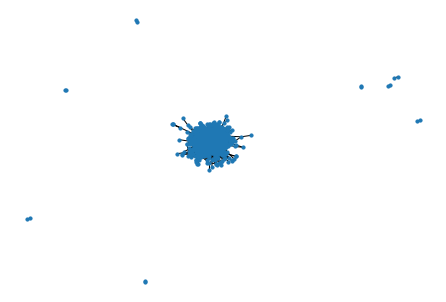

In [18]:
import networkx as nx
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=10, labels=mylabels, with_labels=False)
    plt.show()

show_graph_with_labels(A, label)